In [1]:
from smiles.change_format import log_to_smiles
from rdkit import Chem
from rdkit.Chem import Descriptors, PandasTools
import pandas as pd

In [2]:
log_paths = [
    '/Users/watanabeyuuya/OneDrive - 横浜国立大学/五東研究室/研究/datasets/OXEs/OXE01_excited_#_td_b3lyp_6-311++G(3d2f_2d2p).log',
    '/Users/watanabeyuuya/OneDrive - 横浜国立大学/五東研究室/研究/datasets/OXEs/OXE02_excited_#_td_b3lyp_cam-6-311++G(2d_p)_nstates_20.log',
    '/Users/watanabeyuuya/OneDrive - 横浜国立大学/五東研究室/研究/datasets/oximesters/oxims/FC(F)C(F)(F)C(F)(F)C(F)(F)Oc1ccccc1QC(=NQOC(=O)C)c(cc2)cc(c23)c4c(n3C[C@H](CC)CCCC)c5c(cccc5)c(c4)C(=O)c6c(C)cc(C)cc6C_excited_#_td=(singlets&_Nstates=10)_b3lyp_6-311+G(2d&_p)_guess=read_geom=allcheck.log',
    '/Users/watanabeyuuya/OneDrive - 横浜国立大学/五東研究室/研究/datasets/OXEs/OXE04_excited_#_td=(singlets&Nstates=10)_b3lyp_6-311+G(2d&_p)_guess=read_geom=allcheck.log',
    '/Users/watanabeyuuya/OneDrive - 横浜国立大学/五東研究室/研究/datasets/OXEs/UVS-OE1/UVS-OE1_excited_#_td=(singlets)_b3lyp_6-311++G(2d_p).log',
    '/Users/watanabeyuuya/OneDrive - 横浜国立大学/五東研究室/研究/datasets/OXEs/UVS-OE2/UVS-OE2_excited_#_td(singlets_Nstates=10)_b3lyp_6-311+g(2d&p)_guess=read_geom=allcheck.log',
    '/Users/watanabeyuuya/OneDrive - 横浜国立大学/五東研究室/研究/datasets/OXEs/UVS-OE3/UVS-O3_n_excited_#_b3lyp_6-311+g(2d&p)_td=(singlets&nstates=10)_guess=read_geom=allcheck.log',
    '/Users/watanabeyuuya/OneDrive - 横浜国立大学/五東研究室/研究/datasets/OXEs/UVS-OE4/energy/UVS-OE4_n.log'
]

In [3]:
smiles = []
for log in log_paths:
    s = log_to_smiles(log)
    smiles.append(s)
df = pd.DataFrame()
df['Smiles'] = smiles
df.head()

,Smiles
0,c1cc(ccc1)C(=O)O/N=C(\CCCCCC)/C(=O)c1ccc(cc1)S...
1,c1cc(ccc1)C(=O)O[N][C](C)C(=O)c1ccc2c(c1)n(c1c...
2,FC(F)C(F)(F)C(F)(F)C(F)(F)Oc1ccccc1/C(=N/OC(=O...
3,c1cc(ccc1)C(=O)O/N=C(\CC1CCCC1)/C(=O)c1ccc(cc1...
4,c1cc2c(cc1)c(c1c(c2OCCCC/C(=N/OC(=O)C)/C)cccc1...


In [4]:
tpsas = []
fc3s = []
nrbs = []
for s in smiles:
    mol = Chem.MolFromSmiles(s)
    tpsa = Descriptors.TPSA(mol)
    frac_sp3 = Descriptors.FractionCSP3(mol)
    num_rot_bond = Descriptors.NumRotatableBonds(mol)
    tpsas.append(tpsa)
    fc3s.append(frac_sp3)
    nrbs.append(num_rot_bond)

,Smiles,TPSA,FractionCSP3,NumRotatableBonds,structure
0,c1cc(ccc1)C(=O)O/N=C(\CCCCCC)/C(=O)c1ccc(cc1)S...,55.73,0.222222,11,
1,c1cc(ccc1)C(=O)O[N][C](C)C(=O)c1ccc2c(c1)n(c1c...,79.47,0.125000,8,
2,FC(F)C(F)(F)C(F)(F)C(F)(F)Oc1ccccc1/C(=N/OC(=O...,69.89,0.340426,16,
3,c1cc(ccc1)C(=O)O/N=C(\CC1CCCC1)/C(=O)c1ccc(cc1...,55.73,0.222222,8,
4,c1cc2c(cc1)c(c1c(c2OCCCC/C(=N/OC(=O)C)/C)cccc1...,95.78,0.400000,14,

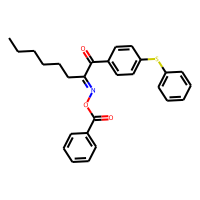
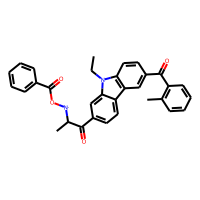
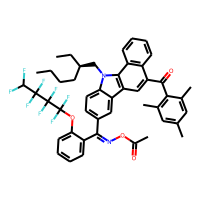
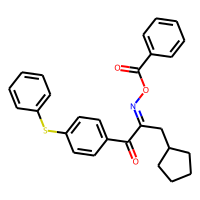
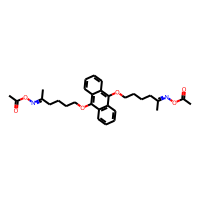

In [5]:
df['TPSA'] = tpsas
df['FractionCSP3'] = fc3s
df['NumRotatableBonds'] = nrbs
PandasTools.AddMoleculeColumnToFrame(df, molCol='structure', smilesCol='Smiles')
df.head()

In [6]:
df.to_csv('./data/OXEs.csv')

,Smiles,TPSA,FractionCSP3,NumRotatableBonds,structure
0,c1cc(ccc1)C(=O)O/N=C(\CCCCCC)/C(=O)c1ccc(cc1)S...,55.73,0.222222,11,
1,c1cc(ccc1)C(=O)O[N][C](C)C(=O)c1ccc2c(c1)n(c1c...,79.47,0.125000,8,
2,FC(F)C(F)(F)C(F)(F)C(F)(F)Oc1ccccc1/C(=N/OC(=O...,69.89,0.340426,16,
3,c1cc(ccc1)C(=O)O/N=C(\CC1CCCC1)/C(=O)c1ccc(cc1...,55.73,0.222222,8,
4,c1cc2c(cc1)c(c1c(c2OCCCC/C(=N/OC(=O)C)/C)cccc1...,95.78,0.400000,14,
5,c1cc2c(cc1)c(c1c(c2OC/C(=N/OC(=O)C)/C)cccc1)OC...,95.78,0.250000,8,
6,c1cc2c(cc1)c(c1c(c2OC/C(=N\OC(=O)C)/C(C)(C)C)c...,95.78,0.400000,8,
7,c1cc2c(cc1)c(c1c(c2OC/C(=N/OC(=O)C)/c2ccccc2)c...,95.78,0.117647,10,

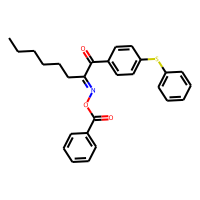
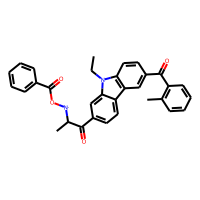
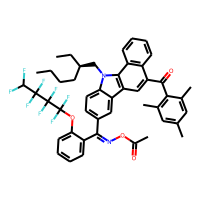
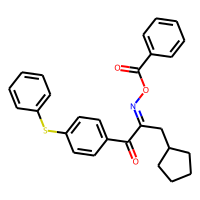
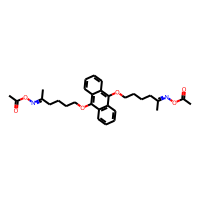
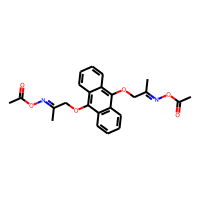
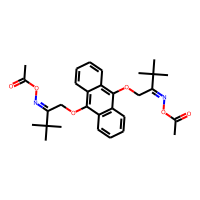
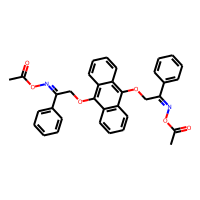

In [7]:
df

In [ ]:
# import
from dataframe.load import load_csv
from plot.graph import plot_3d
## plot
DF_PATH = ""
df = load_csv(DF_PATH)
df.head()
BDE = df['BDE']
integral = df['log_integral']
decarboxylation_enthalpy = df['decarboxylation_enthalpy']

special_plot = [
    []
]
plot_3d(BDE, integral, decarboxylation_enthalpy, figsize=(15, 15), save_dir='./result', to_movie=True)